**The Perceptron**

* The perceptron is one of the simplest ANN architectures. It is based on slightly different in artificial neuron, called threshold logic unit or linear threshold unit.
* The TLU first compute linear function of inputs:

z= w1*x1 + w2*x2 + .... + wn*xn= w^T + b.
* Then it applies to step function to the result ans so it's almost like to logistic regression.

h(x)= step(z)
* A single TLU can be used for single binary classification, it computes linear function with its input and results exceeds a threshold, it outputs the positive class.
* A perceptron is composed of one or more TLUs as organized in single layer, where every TLU is connected to every input. Such layer is called fully connected layer

hw,b(X) = fi(XW+b)
* X= matrix of input feature= row per instance and columns per feature
* W= matrix contain all connection of weights- one row per input and one column per neuron
* bias vector b- contain bias term- one per neuro
* fi- activation function- when  artificial neuraons are TLUs, it is step function

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris= load_iris()
X= iris.data[:,(2,3)]
y= (iris.target==0).astype(np.int32)

per_clf= Perceptron(random_state=42)
per_clf.fit(X,y)

X_new= [[2,0.5],[3,1]]
y_pred= per_clf.predict(X_new)



**Multilayer Percerptron**
* An MLP is composed with input layer,one or more hidden layers and final layer
* When ANN contain deep stack of hidden layer is called deep neural network

**Backpropogation**
* It handles one minibatch at a time and and it goes through full training set at multiple times it is called epochs
* Each mini batch enters the network through input layer. The algorithm computes the output of all neurons in first hidden layer, for every instance in minibatch. The result is pass to next layer and its output computed and passed to next layer and so on until we het the output of last layer, the output layer, This is forward pass.
* Then algorithm measures network's output error function that compares desired output and actual output of the network.
* Then it compute howmuch output bias and each connection to the output layer contributed to the error
* The algorithm measures how much error contributions came from each connection in layer, again using chain rule,working backward until reaches input layer.
* This reverse pass efficiently measure the error gradient across all connection weights and biases in the network propagating error gradient backward through the network.
* This performs gradient descent step to tweak all connection weights in the network.

**In short, back propogation makes predictions for mini batch(forward pass), measures the error, then goes through each layer in reverse to measure the contribution of error in each parameter(reverse pass) and finally tweaks the connection weights and biases to reduce the error(gradient descent step)**

* Gradient descent cannot remove on flat surface, that's why MLP is replaced by step function(sigmoid function= 1/(1+expe(-z)).
* While sigmoid function has well defined non-zero derivative everywhere, allowing gradient descent small progress at every step

* The hyperbolic tanget function(tanh(z)= 2*sigma(2*z)-1): range -1 to 1. S shapes activation function
The range tends to make each layer's output more or less centered around 0 at begining of training, Which helps in speed of convergence

* The rectifier linear unit(ReLU(z)= max(0,z)): relu is continous but not differentiable at z=0. and its derivative is 0 for z< 0, so it compute faster.

**Here's why non-linearity is crucial for neural networks:**

* Real world data is rarly linear: Most phenomena we encounter in the real world involve complex relationships. For example, predicting house prices based on size and location isn't a straight line. A linear model wouldn't capture the way these factors interact to influence price.

* Limited expensiveness linear models: Linear model can create straight line decision boundries. Imagine trying ti seperate two class of data with circle. Linear model simply can't do that

* Non-linear activation function unlock complexity: By introducing non-linear activation functions after the linear combination (w^Tx + b), the network can transform the data in a non-linear way. This allows the network to learn more intricate patterns and relationships in the data.

**Analogy:**
Think of a linear neural network as a simple calculator that can only add and subtract. A non-linear neural network with activation functions is like a scientific calculator that can perform complex mathematical operations. It has a much wider range of capabilities.

In essence, non-linearity is essential for neural networks to move beyond basic linear relationships and tackle the complexities of real-world data.


# **Build an Image Classifier using Keras Sequential API**

In [2]:
!pip install keras

In [4]:
#Using keras to load the dataset
import keras

fashion_minst= keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)= fashion_minst
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train,y_train= X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid= X_train_full[-5000:],y_train_full[-5000:]
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [6]:
X_train,X_valid,X_test= X_train/255.0,X_valid/255.0,X_test/255.0

In [7]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle_coat']

In [10]:
# Creating model using squential API= all layers are composed as single stack of layers connected sequentially
import tensorflow as tf

tf.random.set_seed(42)
model= keras.Sequential()
model.add(keras.layers.Input(shape=[28,28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#het list of model layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
#name of hidden layer
model.layers[1].name

'dense'

In [13]:
#all the parameters of layer can accessed
hidden1= model.layers[1]
weights,bias= hidden1.get_weights()
print(f'Weights: {weights}')
print(f'Biases: {bias}')

Weights: [[ 4.6832353e-02  6.4087316e-02 -5.2071512e-02 ... -4.9458884e-02
  -8.4504485e-05 -5.4760501e-03]
 [ 1.0606937e-02  4.8328079e-02 -5.4228023e-02 ... -2.2591677e-02
   5.8103323e-02  7.1844876e-02]
 [ 7.2279647e-03 -1.6540512e-03 -3.0343205e-02 ... -3.4658577e-02
   2.1726266e-02 -1.0840468e-02]
 ...
 [-1.9582856e-02  3.8419053e-02 -1.9921809e-02 ...  5.5331513e-02
  -7.7758878e-03 -7.2767220e-02]
 [ 2.2197224e-02  6.6502854e-02  4.3334343e-02 ... -4.6125658e-02
   3.9678961e-02 -5.4605469e-02]
 [ 3.5666265e-02  3.5249747e-02  2.2737123e-02 ...  3.7335239e-02
   1.8820718e-02  5.6152403e-02]]
Biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.

In [14]:
#Compiling the model
model.compile(optimizer="sgd",
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#sparse_categorical_crossentropy loss= we have one target probability per class for each instance

**Epoch**

* Epoch represents one complete pass through entire training  dataset.
* Imagine you have book of information for training your model. An epoch signifies going through entire book once.
* The number of books you train on determines how many time model sees the whole dataset
* Training more epoch allows the model to learn more complex data

**Training step:**

* A training step refers to single update of model's internal parameters based on batch of data.
* Thinks of chapter in training book. A training steps signifies processing a small chunk of information from the chapter.
* Each epoch consists many training steps depend on batch size and size of your training dataset.
  * A larger batch size reduce number of steps per epochs
  * A small batch size increase number of steps

**Analogy**

* Imagine learning a new language.
* An epoch would be like going through your entire language textbook once.
* A training step would be like studying a single page or section from that textbook.
* The number of times you go through the textbook (epochs) determines how well you learn the language.
* How you study each section (batch size) can impact how efficiently you learn the material.


**How batch size is calculated**

- Batch size is 32 by default means suppose training set has 55000 images, model goes through 1719(55000/32) batches per epoch.
- If batch size is 32, model will take 32 images at a time,calculate errro loss and update internal parameters
- The model will go through 1719 batches per epoch
- 32, updates its parameters after each batch, and keeps going until it finishes all the batches (1719 in this case).
- Set of class weight argument given when calling fit method and larger weights to underrepresented class and lower weights to overrepresented class
- If need per instance per weight then need to give argument set sample_weight

In [15]:
history= model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6872 - loss: 1.0224 - val_accuracy: 0.8240 - val_loss: 0.5106
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8266 - loss: 0.5098 - val_accuracy: 0.8378 - val_loss: 0.4583
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8436 - loss: 0.4559 - val_accuracy: 0.8480 - val_loss: 0.4340
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8520 - loss: 0.4255 - val_accuracy: 0.8488 - val_loss: 0.4192
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8585 - loss: 0.4040 - val_accuracy: 0.8538 - val_loss: 0.4085
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8656 - loss: 0.3870 - val_accuracy: 0.8554 - val_loss: 0.3989
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8695 - loss: 0.3730 - val_accuracy: 0.8570 - val_loss: 0.3902
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8734 - loss: 0.360

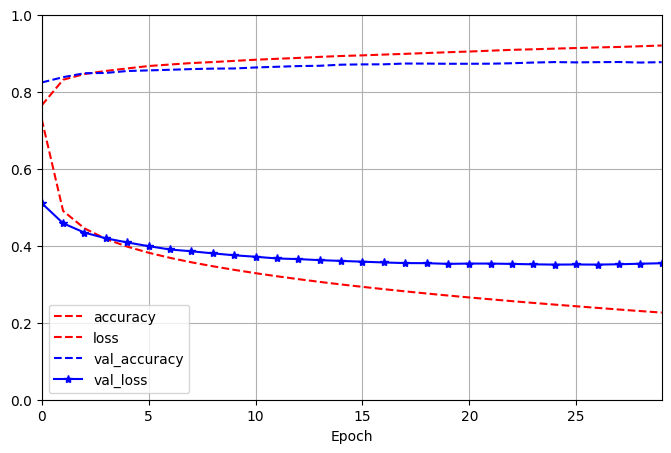

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=['r--','r--','b--','b-*'])
plt.show()

In [ ]:
#training error is computed during mean of each epoch and validation error computed at last of each epoch
#training set performance ends up beating validation performance.when model not converge yet
# if not satisfy with performance of model, should go back and and tune the hyperparameters(number of layers,number of neuron,batch size,learning rate)

In [17]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8737 - loss: 0.3675


[0.3669320046901703, 0.8733999729156494]

In [18]:
X_new= X_test[:3]
y_proba= model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.01, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
import numpy as np

y_pred= y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [20]:
np.array(class_names)[y_pred]

array(['Ankle_coat', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new= y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# **Building Regression MLP using Sequential API**

In [22]:
tf.random.set_seed(42)
norm_layer= tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model= keras.Sequential([
    norm_layer,
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1)
])

optimizer= keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)

history= model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
mse_test,rmse_test= model.evaluate(X_test,y_test)
X_new= X_test[:3]
y_pred= model.predict(X_new)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - RootMeanSquaredError: 3.0224 - loss: 9.1846 - val_RootMeanSquaredError: 2.8798 - val_loss: 8.2931
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - RootMeanSquaredError: 2.8840 - loss: 8.3173 - val_RootMeanSquaredError: 2.8765 - val_loss: 8.2741
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - RootMeanSquaredError: 2.8794 - loss: 8.2909 - val_RootMeanSquaredError: 2.8778 - val_loss: 8.2816
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - RootMeanSquaredError: 2.8774 - loss: 8.2793 - val_RootMeanSquaredError: 2.8769 - val_loss: 8.2763
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - RootMeanSquaredError: 2.8760 - loss: 8.2715 - val_RootMeanSquaredError: 2.8751 - val_loss: 8.2662
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - RootMeanSquaredError: 2.8749 - loss: 8.2654 - val_RootMeanSquaredError: 2.8727 - val_loss: 8.2525
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - RootMeanSqua

# **Building Complex Model using the functional API**


In [26]:
normalization_layer= keras.layers.Normalization()
hidden_layer1= keras.layers.Dense(30,activation='relu')
hidden_layer2= keras.layers.Dense(30,activation='relu')
concat_layer= keras.layers.Concatenate()
output_layer= keras.layers.Dense(1)

input_= keras.layers.Input(shape=X_train.shape[1:])
normalized= normalization_layer(input_)
hidden1= hidden_layer1(normalized)
hidden2= hidden_layer2(hidden1)
concat= concat_layer([normalized,hidden2])
output= output_layer(concat)

model= keras.Model(inputs=[input_],outputs=[output])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_4           │ (None, 28, 28)         │             57 │ input_layer_5[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 28, 30)         │            870 │ normalization_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 28, 30)         │            930 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 28, 58)         │              0 │ normalization_4[0][0], │
│ (Concatenate)             │                        │                │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 28, 1)          │             59 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,916 (7.49 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 57 (232.00 B)

# **Handling multiple inputs**

In [27]:
input_wide= keras.layers.Input(shape=[5])
input_deep= tf.keras.layers.Input(shape=[6])

norm_layer_wide= keras.layers.Normalization()
norm_layer_deep= keras.layers.Normalization()

norm_wide= norm_layer_wide(input_wide)
norm_deep= norm_layer_deep(input_deep)

hidden1= keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2= keras.layers.Dense(30,activation='relu')(hidden1)

concat= keras.layers.concatenate([norm_wide,hidden2])

output= keras.layers.Dense(1)(concat)

model= keras.Model(inputs=[input_wide,input_deep],outputs=[output])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_6           │ (None, 6)              │             13 │ input_layer_7[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_6             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 30)             │            210 │ normalization_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_5           │ (None, 5)              │             11 │ input_layer_6[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 30)             │            930 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 35)             │              0 │ normalization_5[0][0], │
│ (Concatenate)             │                        │                │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 1)              │             36 │ concatenate_3[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

- Neural network can learn features in the data that are useful accross it

- Regulization- is to reduce overfitting and improve model's ability

In [29]:
#adding regulization auxilary output
input_wide= keras.layers.Input(shape=[5])
input_deep= keras.layers.Input(shape=[6])

norm_layer_wide= keras.layers.Normalization()
norm_layer_deep= keras.layers.Normalization()

norm_wide= norm_layer_wide(input_wide)
norm_deep= norm_layer_deep(input_deep)

hidden1= keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2= keras.layers.Dense(30,activation='relu')(hidden1)

concat= keras.layers.concatenate([norm_wide,hidden2])

output= keras.layers.Dense(1)(concat)
aux_output= keras.layers.Dense(1)(hidden2)

model= keras.Model(inputs=[input_wide,input_deep],outputs=[output,aux_output])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_10          │ (None, 6)              │             13 │ input_layer_11[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 30)             │            210 │ normalization_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_9           │ (None, 5)              │             11 │ input_layer_10[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 30)             │            930 │ dense_22[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 35)             │              0 │ normalization_9[0][0], │
│ (Concatenate)             │                        │                │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 1)              │             36 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 1)              │             31 │ dense_23[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

# **Using Subclassing API to build dynamic Models**

* Both Sequential and functiona API are declarative: you start by declaring which layers you want to use and how they should be connected and only then can you start feeding the model some data for training or inference.

* This has many advantages: the model can easily clones,saved and shared; Its structure can be displayed and analyzed; The frameworks can infer shapes and check types, so error can be caught early.

* With this approch, you subclass the Model class,create the layers you need in the constructor and use then to perform computations you want to call() in the method.



In [41]:
class WideAndDeepModel(keras.Model):
  def __init__(self,units=30,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide= tf.keras.layers.Normalization()
    self.norm_layer_deep= tf.keras.layers.Normalization()
    self.hidden1= tf.keras.layers.Dense(units,activation= activation)
    self.hidden2= tf.keras.layers.Dense(units,activation=activation)
    self.main_output= tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)

  def call(self,inputs):
    input_wide,input_deep= inputs
    norm_wide= self.norm_layer_wide(input_wide)
    norm_deep= self.norm_layer_deep(input_deep)
    hidden1= self.hidden1(norm_deep)
    hidden2= self.hidden1(hidden1)
    concat= tf.keras.layers.concatenate([norm_wide,hidden2])
    output= self.main_output(concat)
    aux_output= self.aux_output= self.aux_output(hidden2)
    return output,aux_output

model= WideAndDeepModel(30,activation='relu',name='my_cool_model')
model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_13 (Normalization)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_14 (Normalization)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **Saving and restoring model**

* In particular saved_mode.pb file contain model's architecture and logic in the form of serialize computation graph
* keras_metadata.pb file contains extra information needed by keras variable subdirectory contain all parameters values(includes weights,biases,the normalization statistcs and optimization parameters), possibly split across multiple file if model is very large
* Asset directory contain extra files, such as data samples,feature names,class names




In [ ]:
model.save("my_keras_model.keras")
#also can save weights only= save_weights()

keras.saving.load_model('my_keras_model.keras')
#ans also can load weights only= load_weights()


# **Using callbacks**

* fit() method accepts callback argument and keras will call before and after training of each epoch and also some time before and after each batch.



In [ ]:
#model check point callbacks saves checkpoint of your model at regular interval durring training
checkpoint_cb= tf.keras.callbacks.ModelCheckpoint("my_checkpoint",save_weights_only=True)
history= model.fit([...],callbacks= [checkpoint_cb])
#if you use validation set at training then also use save_best_only=True
#if there is overfitting training set- simply restore last saved model and this will best model on validation set


#Early stopping callback= it interrupt the training when it measure no progress on validation set for number of epochs
#if you set resotre_best_weights=True - then it will save best model at end of training
early_stopping_cb= tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history= model.fit([...],callbacks= [checkpoint_cb,early_stopping_cb])

In [ ]:
#can write custom callbacks
class PrivateTrainRatioCallback(tf.keras.callbacks.Callback):
  ratio= log['val_loss']/log['loss']
  print(f'Epoch= {epoch}, val/train={ratio:.2f}')



# **Using tensorboard for Visualization**

* Tensorboard is great visualization tool that you can use to view the learning curves during training,compare curves and metrics between multiple runs, visualize the computation graph,analyze training statistics,view image generated by model,visualize complex multidimensional data
* Tensorboard is automatically installed when you install tensorflow


In [ ]:
%pip install -q -U tensorboard-plugin-profile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.7 MB/s eta 0:00:00


* In tensorboard you must modified your program so that output data you want to visualize to special binary log files called event files
* Each binary data record is called summary
* Tensorboard will monitor log directory and will automatically pick up changes and update the visualizations


In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="mylogs"):
  return Path(root_logdir)/strftime(%y-%m-%d)

tensorboard_cb= tf.keras.callback.TensorBoard(run_logdir,profile_batch=(100,200))
history= model.fit([...],callbacks=[tensorboard_cb])